In [2]:
#installing dependcies
!pip install PyArabic
!wget https://s3.amazonaws.com/dl4j-resources/word2vec/glove.6B.zip
!pip install arabic_reshaper
!pip install python-bidi
!pip install wordcloud

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
!wget "https://bakrianoo.sfo2.digitaloceanspaces.com/aravec/full_grams_cbow_100_twitter.zip"
!unzip "full_grams_cbow_100_twitter.zip"

'wget' is not recognized as an internal or external command,
operable program or batch file.
'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [4]:
import requests
import json
import pandas as pd
import numpy as np
from tqdm import tqdm
import re
import string
import sys
import pyarabic.araby as araby
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize, sent_tokenize
from textblob import Word
import gensim
from sklearn import preprocessing
import pandas as pd
import matplotlib.pyplot as plt
from bidi.algorithm import get_display
import arabic_reshaper
from wordcloud import WordCloud
import gensim
import re
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split


In [5]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

# List of URLs to scrape
urls = ['https://ar.wikiquote.org/wiki/%D8%A3%D9%85%D8%AB%D8%A7%D9%84_%D8%B9%D8%B1%D8%A7%D9%82%D9%8A%D8%A9', 'https://ar.wikiquote.org/wiki/%D8%A3%D9%85%D8%AB%D8%A7%D9%84_%D8%AA%D9%88%D9%86%D8%B3%D9%8A%D8%A9', 'https://ar.wikiquote.org/wiki/%D8%A3%D9%85%D8%AB%D8%A7%D9%84_%D8%AC%D8%B2%D8%A7%D8%A6%D8%B1%D9%8A%D8%A9']

# Create an empty list to store the data
data_list = []

# Loop through each URL
for url in urls:
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    # Extract the title
    titles = soup.find_all('span', class_='mw-page-title-main')
    title = titles[0].text if titles else None

    # Extract the paragraphs
    paragraphs_text = soup.select_one('#bodyContent ul').text
    paragraphs_list = paragraphs_text.split('\n')
    paragraphs_list = [paragraph.strip() for paragraph in paragraphs_list if paragraph.strip()]

    # Create a list of dictionaries for each row of data
    data_list.extend([{'dialect': title, 'text': paragraph} for paragraph in paragraphs_list])

# Convert the list of dictionaries to a pandas DataFrame
df = pd.DataFrame(data_list)

# Remove the word 'أمثال' from the 'Title' column
df['dialect'] = df['dialect'].str.replace('أمثال', '')


# Save the DataFrame to a CSV file
df.to_csv('scraped_data.csv', index=False )

df = pd.read_csv('scraped_data.csv', encoding='utf-8')



In [6]:
df

,dialect,text
0,عراقية,مو كل عصفور ينكال لحمه
1,عراقية,مع الخيل يا شگرة
2,عراقية,الطول طول نخلة والعقل عقل الصخلة
3,عراقية,اليدري يدري والمايدري گضبة(قبضة) عدس
4,عراقية,طبل صوته عالي ومن جوه فارغ
...,...,...
142,جزائرية,حتى ينور الملح
143,جزائرية,دوام الحال من المحال
144,جزائرية,ليت الشباب يعود يوما لاخبره ماذا فعل بي المشيب
145,جزائرية,الوقتك


In [7]:
df['dialect'].unique()

array([' عراقية', ' تونسية', ' جزائرية'], dtype=object)

In [8]:
name_mapping = {
    'عراقية': 'IQ',
    'تونسية': 'TN',
    'جزائرية': 'DZ'
    # Add more name mappings as needed
}

# Replace Arabic names with abbreviations
df['dialect'] = df['dialect'].replace(name_mapping,regex=True)

# Save the updated DataFrame back to a new CSV file
df.to_csv('scraped_data.csv', index=False,encoding='utf-8')

In [9]:
df

,dialect,text
0,IQ,مو كل عصفور ينكال لحمه
1,IQ,مع الخيل يا شگرة
2,IQ,الطول طول نخلة والعقل عقل الصخلة
3,IQ,اليدري يدري والمايدري گضبة(قبضة) عدس
4,IQ,طبل صوته عالي ومن جوه فارغ
...,...,...
142,DZ,حتى ينور الملح
143,DZ,دوام الحال من المحال
144,DZ,ليت الشباب يعود يوما لاخبره ماذا فعل بي المشيب
145,DZ,الوقتك


In [10]:
import pandas as pd

# Assuming you have two DataFrames: df1 and df2
# Replace 'df1' and 'df2' with the actual names of your DataFrames

# Example DataFrames
df1 = pd.read_csv('arabic_dialects_clean.csv', encoding='utf-8')
df2 = pd.read_csv('scraped_data.csv', encoding='utf-8')

# Concatenate DataFrames vertically to increase the number of rows
combined_df = pd.concat([df1, df2], ignore_index=True)

# Display the combined DataFrame
print(combined_df)

# Save the combined DataFrame to a new CSV file
combined_df.to_csv('combined_data.csv', index=False, encoding='utf-8')



C:\Users\hadee\AppData\Local\Temp\ipykernel_32020\2332412852.py:7: DtypeWarning: Columns (0,1,2,6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('arabic_dialects_clean.csv', encoding='utf-8')


                          id dialect  \
0        1175358310087892992      IQ   
1        1175416117793349632      IQ   
2        1175450108898565888      IQ   
3        1175471073770573824      IQ   
4        1175496913145217024      IQ   
...                      ...     ...   
1188814                  NaN      DZ   
1188815                  NaN      DZ   
1188816                  NaN      DZ   
1188817                  NaN      DZ   
1188818                  NaN      DZ   

                                                      text  word_count  \
0         @Nw8ieJUwaCAAreT لكن بالنهاية .. ينتفض .. يغير .         8.0   
1        @7zNqXP0yrODdRjK يعني هذا محسوب على البشر .. ح...        19.0   
2                          @KanaanRema مبين من كلامه خليجي         5.0   
3               @HAIDER76128900 يسلملي مرورك وروحك الحلوه💐         5.0   
4                       @hmo2406 وين هل الغيبه  اخ محمد 🌸🌺         8.0   
...                                                    ...         ...   
1

In [11]:
combined_df

,id,dialect,text,word_count,char_count,avg_char_per_word,stopwords,emoji_count,clean_text
0,1175358310087892992,IQ,@Nw8ieJUwaCAAreT لكن بالنهاية .. ينتفض .. يغير .,8.0,48.0,5.125000,1,0.0,لكن بالنهايه ينتفض يغير
1,1175416117793349632,IQ,@7zNqXP0yrODdRjK يعني هذا محسوب على البشر .. ح...,19.0,120.0,5.368421,3,0.0,يعني هذا محسوب علي البشر حيونه ووحشيه وتطلبون ...
2,1175450108898565888,IQ,@KanaanRema مبين من كلامه خليجي,5.0,31.0,5.400000,1,0.0,مبين من كلامه خليجي
3,1175471073770573824,IQ,@HAIDER76128900 يسلملي مرورك وروحك الحلوه💐,5.0,42.0,7.600000,0,1.0,يسلملي مرورك وروحك الحلوه
4,1175496913145217024,IQ,@hmo2406 وين هل الغيبه اخ محمد 🌸🌺,8.0,34.0,3.857143,1,2.0,وين هل الغيبه اخ محمد
...,...,...,...,...,...,...,...,...,...
1188814,NaN,DZ,حتى ينور الملح,NaN,NaN,NaN,NaN,NaN,NaN
1188815,NaN,DZ,دوام الحال من المحال,NaN,NaN,NaN,NaN,NaN,NaN
1188816,NaN,DZ,ليت الشباب يعود يوما لاخبره ماذا فعل بي المشيب,NaN,NaN,NaN,NaN,NaN,NaN
1188817,NaN,DZ,الوقتك,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
combined_df= combined_df.dropna()

In [13]:
#Removing Punctuations and Symbols
arabic_punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ'''
english_punctuations = string.punctuation
punctuations_list = arabic_punctuations + english_punctuations

def remove_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

combined_df['text'] = combined_df['text'].apply(remove_punctuations)

C:\Users\hadee\AppData\Local\Temp\ipykernel_32020\1856434110.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df['text'] = combined_df['text'].apply(remove_punctuations)


In [14]:
#Remove Emojis
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

combined_df['text'] = combined_df['text'].apply(remove_emoji)

C:\Users\hadee\AppData\Local\Temp\ipykernel_32020\3024055986.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df['text'] = combined_df['text'].apply(remove_emoji)


In [15]:
#Stop Words Elimination
nltk.download('stopwords')
stop=stopwords.words('arabic')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hadee\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
combined_df['text'] = combined_df['text'].apply(lambda x:" ".join(x for x in x.split() if x not in stop))

C:\Users\hadee\AppData\Local\Temp\ipykernel_32020\2034086765.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df['text'] = combined_df['text'].apply(lambda x:" ".join(x for x in x.split() if x not in stop))


In [17]:
# Remove Diacritics
def remove_diacritics(text):
    arabic_diacritics = re.compile("""
                             ّ    | # Tashdid
                             َ    | # Fatha
                             ً    | # Tanwin Fath
                             ُ    | # Damma
                             ٌ    | # Tanwin Damm
                             ِ    | # Kasra
                             ٍ    | # Tanwin Kasr
                             ْ    | # Sukun
                             ـ     # Tatwil/Kashida
                         """, re.VERBOSE)
    text = re.sub(arabic_diacritics, '', text)
    text = araby.strip_diacritics(text)
    text = araby.strip_shadda(text)
    text = araby.strip_tashkeel(text)
    return text

combined_df['text'] = combined_df['text'].apply(remove_diacritics)

C:\Users\hadee\AppData\Local\Temp\ipykernel_32020\88152610.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df['text'] = combined_df['text'].apply(remove_diacritics)


In [18]:
#Remove Non-Arabic Characters
def remove_non_arabic(text):
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,،-./:;<=>؟?@[\]^_`{|}~"""), ' ', text)
    text = re.sub('([@A-Za-z0-9_ـــــــــــــ]+)|[^\w\s]|#|http\S+',' ',text)
    return text

combined_df['text'] = combined_df['text'].apply(remove_non_arabic)

C:\Users\hadee\AppData\Local\Temp\ipykernel_32020\3086207117.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df['text'] = combined_df['text'].apply(remove_non_arabic)


In [19]:
#Remove Repeated Characters
def remove_repeating_characters(text):
    text = text.strip()
    text = re.sub("[إأٱآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ؤ", "ء", text)
    text = re.sub("ئ", "ء", text)
    text = re.sub("ة", "ه", text)
    text = re.sub(r'(.)\1+', r'\1', text)
    return text

combined_df['text'] = combined_df['text'].apply(remove_repeating_characters)

C:\Users\hadee\AppData\Local\Temp\ipykernel_32020\3785133116.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df['text'] = combined_df['text'].apply(remove_repeating_characters)


In [20]:
#Lemmatisation
nltk.download('wordnet')
combined_df['text'] = combined_df['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hadee\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
C:\Users\hadee\AppData\Local\Temp\ipykernel_32020\617914366.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df['text'] = combined_df['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))


In [21]:
combined_df

,id,dialect,text,word_count,char_count,avg_char_per_word,stopwords,emoji_count,clean_text
0,1175358310087892992,IQ,بالنهايه ينتفض يغير,8.0,48.0,5.125000,1,0.0,لكن بالنهايه ينتفض يغير
1,1175416117793349632,IQ,يعني محسوب البشر حيونه وحشيه وتطلبون الغرب يحت...,19.0,120.0,5.368421,3,0.0,يعني هذا محسوب علي البشر حيونه ووحشيه وتطلبون ...
2,1175450108898565888,IQ,مبين كلامه خليجي,5.0,31.0,5.400000,1,0.0,مبين من كلامه خليجي
3,1175471073770573824,IQ,يسلملي مرورك وروحك الحلوه,5.0,42.0,7.600000,0,1.0,يسلملي مرورك وروحك الحلوه
4,1175496913145217024,IQ,وين الغيبه اخ محمد,8.0,34.0,3.857143,1,2.0,وين هل الغيبه اخ محمد
...,...,...,...,...,...,...,...,...,...
1188667,1019484980282580992,BH,مبسوطين منك الي باسطانا,5.0,37.0,6.600000,0,1.0,مبسوطين منك اللي باسطانا
1188668,1021083283709407232,BH,واله ماينده ابش يختي,6.0,44.0,6.500000,0,0.0,والله ماينده ابش يختي
1188669,1017477537889431552,BH,شو عملنا حنا تهربي منا احنا مساكين ليش بتعملي ...,14.0,73.0,4.285714,1,2.0,شو عملنا لك حنا تهربي مننا احنا مساكين ليش بتع...
1188670,1022430374696239232,BH,اله يبارك وبالعافيه,6.0,43.0,6.333333,1,3.0,الله يبارك فيها وبالعافيه


In [22]:
combined_df['dialect'].unique()

array(['IQ', 'LY', 'QA', 'PL', 'SY', 'TN', 'JO', 'MA', 'SA', 'YE', 'DZ',
       'EG', 'LB', 'KW', 'OM', 'SD', 'AE', 'BH'], dtype=object)

In [23]:
text = combined_df['text'].values.tolist()
target = combined_df['dialect'].values.tolist()
combined_df['label_num'] = combined_df['dialect'].map({'IQ' : 0, 'LY': 1,'QA':2,'PL':3,'SY':4,
                                            'TN':5,'JO':6,'MA':7,'SA':8,'YE':9,'DZ':10,
                                            'EG':11,'LB':12,'KW':13,'OM':14,'SD':15,
                                            'AE':16,'BH':17})
combined_df

C:\Users\hadee\AppData\Local\Temp\ipykernel_32020\3895558022.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df['label_num'] = combined_df['dialect'].map({'IQ' : 0, 'LY': 1,'QA':2,'PL':3,'SY':4,


,id,dialect,text,word_count,char_count,avg_char_per_word,stopwords,emoji_count,clean_text,label_num
0,1175358310087892992,IQ,بالنهايه ينتفض يغير,8.0,48.0,5.125000,1,0.0,لكن بالنهايه ينتفض يغير,0
1,1175416117793349632,IQ,يعني محسوب البشر حيونه وحشيه وتطلبون الغرب يحت...,19.0,120.0,5.368421,3,0.0,يعني هذا محسوب علي البشر حيونه ووحشيه وتطلبون ...,0
2,1175450108898565888,IQ,مبين كلامه خليجي,5.0,31.0,5.400000,1,0.0,مبين من كلامه خليجي,0
3,1175471073770573824,IQ,يسلملي مرورك وروحك الحلوه,5.0,42.0,7.600000,0,1.0,يسلملي مرورك وروحك الحلوه,0
4,1175496913145217024,IQ,وين الغيبه اخ محمد,8.0,34.0,3.857143,1,2.0,وين هل الغيبه اخ محمد,0
...,...,...,...,...,...,...,...,...,...,...
1188667,1019484980282580992,BH,مبسوطين منك الي باسطانا,5.0,37.0,6.600000,0,1.0,مبسوطين منك اللي باسطانا,17
1188668,1021083283709407232,BH,واله ماينده ابش يختي,6.0,44.0,6.500000,0,0.0,والله ماينده ابش يختي,17
1188669,1017477537889431552,BH,شو عملنا حنا تهربي منا احنا مساكين ليش بتعملي ...,14.0,73.0,4.285714,1,2.0,شو عملنا لك حنا تهربي مننا احنا مساكين ليش بتع...,17
1188670,1022430374696239232,BH,اله يبارك وبالعافيه,6.0,43.0,6.333333,1,3.0,الله يبارك فيها وبالعافيه,17


In [24]:
#Encoding output labels
encoding = preprocessing.LabelEncoder()

#using fit transform on the data
y = encoding.fit_transform(combined_df.dialect.values)

#replace dialec column with the encoded
combined_df['dialect_num'] = y
combined_df

C:\Users\hadee\AppData\Local\Temp\ipykernel_32020\2133289740.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df['dialect_num'] = y


,id,dialect,text,word_count,char_count,avg_char_per_word,stopwords,emoji_count,clean_text,label_num,dialect_num
0,1175358310087892992,IQ,بالنهايه ينتفض يغير,8.0,48.0,5.125000,1,0.0,لكن بالنهايه ينتفض يغير,0,4
1,1175416117793349632,IQ,يعني محسوب البشر حيونه وحشيه وتطلبون الغرب يحت...,19.0,120.0,5.368421,3,0.0,يعني هذا محسوب علي البشر حيونه ووحشيه وتطلبون ...,0,4
2,1175450108898565888,IQ,مبين كلامه خليجي,5.0,31.0,5.400000,1,0.0,مبين من كلامه خليجي,0,4
3,1175471073770573824,IQ,يسلملي مرورك وروحك الحلوه,5.0,42.0,7.600000,0,1.0,يسلملي مرورك وروحك الحلوه,0,4
4,1175496913145217024,IQ,وين الغيبه اخ محمد,8.0,34.0,3.857143,1,2.0,وين هل الغيبه اخ محمد,0,4
...,...,...,...,...,...,...,...,...,...,...,...
1188667,1019484980282580992,BH,مبسوطين منك الي باسطانا,5.0,37.0,6.600000,0,1.0,مبسوطين منك اللي باسطانا,17,1
1188668,1021083283709407232,BH,واله ماينده ابش يختي,6.0,44.0,6.500000,0,0.0,والله ماينده ابش يختي,17,1
1188669,1017477537889431552,BH,شو عملنا حنا تهربي منا احنا مساكين ليش بتعملي ...,14.0,73.0,4.285714,1,2.0,شو عملنا لك حنا تهربي مننا احنا مساكين ليش بتع...,17,1
1188670,1022430374696239232,BH,اله يبارك وبالعافيه,6.0,43.0,6.333333,1,3.0,الله يبارك فيها وبالعافيه,17,1


In [25]:
X = encoding.fit_transform(combined_df.text.values)
combined_df['id'] = X
combined_df

C:\Users\hadee\AppData\Local\Temp\ipykernel_32020\4054488788.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df['id'] = X


,id,dialect,text,word_count,char_count,avg_char_per_word,stopwords,emoji_count,clean_text,label_num,dialect_num
0,141972,IQ,بالنهايه ينتفض يغير,8.0,48.0,5.125000,1,0.0,لكن بالنهايه ينتفض يغير,0,4
1,448164,IQ,يعني محسوب البشر حيونه وحشيه وتطلبون الغرب يحت...,19.0,120.0,5.368421,3,0.0,يعني هذا محسوب علي البشر حيونه ووحشيه وتطلبون ...,0,4
2,338638,IQ,مبين كلامه خليجي,5.0,31.0,5.400000,1,0.0,مبين من كلامه خليجي,0,4
3,444188,IQ,يسلملي مرورك وروحك الحلوه,5.0,42.0,7.600000,0,1.0,يسلملي مرورك وروحك الحلوه,0,4
4,427440,IQ,وين الغيبه اخ محمد,8.0,34.0,3.857143,1,2.0,وين هل الغيبه اخ محمد,0,4
...,...,...,...,...,...,...,...,...,...,...,...
1188667,338416,BH,مبسوطين منك الي باسطانا,5.0,37.0,6.600000,0,1.0,مبسوطين منك اللي باسطانا,17,1
1188668,408151,BH,واله ماينده ابش يختي,6.0,44.0,6.500000,0,0.0,والله ماينده ابش يختي,17,1
1188669,247422,BH,شو عملنا حنا تهربي منا احنا مساكين ليش بتعملي ...,14.0,73.0,4.285714,1,2.0,شو عملنا لك حنا تهربي مننا احنا مساكين ليش بتع...,17,1
1188670,82552,BH,اله يبارك وبالعافيه,6.0,43.0,6.333333,1,3.0,الله يبارك فيها وبالعافيه,17,1


In [26]:
!pip install smart_open[c]

In [27]:
import gensim
import smart_open

model = gensim.models.Word2Vec.load("C:/Users/hadee/Downloads/tweet_cbow_100/tweets_cbow_100")



In [28]:
def vectorize(text):
    vectors = []
    tokens = word_tokenize(text)
    for token in tokens:
        try:
            vectors.append(model.wv[token])
        except KeyError:
            continue
    return np.mean(vectors, axis=0)


In [29]:
import nltk
nltk.download('punkt')

combined_df['vector'] = combined_df['text'].apply(lambda text: vectorize(text))
combined_df

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hadee\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
C:\Users\hadee\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\hadee\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\hadee\AppData\Local\Temp\ipykernel_32020\3657435254.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df['vector'] = combined_df['text'].apply(lambda text: vectorize(text))


,id,dialect,text,word_count,char_count,avg_char_per_word,stopwords,emoji_count,clean_text,label_num,dialect_num,vector
0,141972,IQ,بالنهايه ينتفض يغير,8.0,48.0,5.125000,1,0.0,لكن بالنهايه ينتفض يغير,0,4,"[0.73414177, -0.023765722, -0.75099164, -1.589..."
1,448164,IQ,يعني محسوب البشر حيونه وحشيه وتطلبون الغرب يحت...,19.0,120.0,5.368421,3,0.0,يعني هذا محسوب علي البشر حيونه ووحشيه وتطلبون ...,0,4,"[1.2821418, 0.2798267, 1.1415025, -0.25127915,..."
2,338638,IQ,مبين كلامه خليجي,5.0,31.0,5.400000,1,0.0,مبين من كلامه خليجي,0,4,"[0.9292541, 1.2713349, 3.07193, -3.049403, 1.9..."
3,444188,IQ,يسلملي مرورك وروحك الحلوه,5.0,42.0,7.600000,0,1.0,يسلملي مرورك وروحك الحلوه,0,4,"[0.11463176, -0.12048206, -0.6272919, 0.197259..."
4,427440,IQ,وين الغيبه اخ محمد,8.0,34.0,3.857143,1,2.0,وين هل الغيبه اخ محمد,0,4,"[-0.030945837, 0.3578893, 1.285867, -2.0732436..."
...,...,...,...,...,...,...,...,...,...,...,...,...
1188667,338416,BH,مبسوطين منك الي باسطانا,5.0,37.0,6.600000,0,1.0,مبسوطين منك اللي باسطانا,17,1,"[-0.5567038, 1.6042545, -0.64921415, 0.7457627..."
1188668,408151,BH,واله ماينده ابش يختي,6.0,44.0,6.500000,0,0.0,والله ماينده ابش يختي,17,1,"[0.0707078, 0.72599554, -0.5964851, -1.3647552..."
1188669,247422,BH,شو عملنا حنا تهربي منا احنا مساكين ليش بتعملي ...,14.0,73.0,4.285714,1,2.0,شو عملنا لك حنا تهربي مننا احنا مساكين ليش بتع...,17,1,"[0.26980403, 0.11834541, 0.25399992, -0.086855..."
1188670,82552,BH,اله يبارك وبالعافيه,6.0,43.0,6.333333,1,3.0,الله يبارك فيها وبالعافيه,17,1,"[0.33955598, -3.3439386, -1.8221568, -0.862400..."


In [30]:
# Get the integer indices of 'dialect' and 'vector' columns
start_col = combined_df.columns.get_loc('dialect')
end_col = combined_df.columns.get_loc('vector')

# Select rows 0 to 4999 and columns from 'dialect' to 'vector'
subset_df = combined_df.iloc[0:200000, start_col:end_col + 1]

In [31]:
import pandas as pd

# Dictionary to store extracted rows for each dialect
extracted_data = {}

# Define the number of rows to extract per dialect
rows_per_dialect = 7000

# Group data by 'dialect' column
grouped = combined_df.groupby('dialect')

# Loop through each dialect and extract 1000 rows
for dialect, group in grouped:
    extracted_data[dialect] = group.head(rows_per_dialect)

# Combine extracted rows for each dialect into a new DataFrame
result = pd.concat(extracted_data.values())

# Show the resulting DataFrame
result['dialect'].unique()

array(['AE', 'BH', 'DZ', 'EG', 'IQ', 'JO', 'KW', 'LB', 'LY', 'MA', 'OM',
       'PL', 'QA', 'SA', 'SD', 'SY', 'TN', 'YE'], dtype=object)

In [32]:
combined_df

,id,dialect,text,word_count,char_count,avg_char_per_word,stopwords,emoji_count,clean_text,label_num,dialect_num,vector
0,141972,IQ,بالنهايه ينتفض يغير,8.0,48.0,5.125000,1,0.0,لكن بالنهايه ينتفض يغير,0,4,"[0.73414177, -0.023765722, -0.75099164, -1.589..."
1,448164,IQ,يعني محسوب البشر حيونه وحشيه وتطلبون الغرب يحت...,19.0,120.0,5.368421,3,0.0,يعني هذا محسوب علي البشر حيونه ووحشيه وتطلبون ...,0,4,"[1.2821418, 0.2798267, 1.1415025, -0.25127915,..."
2,338638,IQ,مبين كلامه خليجي,5.0,31.0,5.400000,1,0.0,مبين من كلامه خليجي,0,4,"[0.9292541, 1.2713349, 3.07193, -3.049403, 1.9..."
3,444188,IQ,يسلملي مرورك وروحك الحلوه,5.0,42.0,7.600000,0,1.0,يسلملي مرورك وروحك الحلوه,0,4,"[0.11463176, -0.12048206, -0.6272919, 0.197259..."
4,427440,IQ,وين الغيبه اخ محمد,8.0,34.0,3.857143,1,2.0,وين هل الغيبه اخ محمد,0,4,"[-0.030945837, 0.3578893, 1.285867, -2.0732436..."
...,...,...,...,...,...,...,...,...,...,...,...,...
1188667,338416,BH,مبسوطين منك الي باسطانا,5.0,37.0,6.600000,0,1.0,مبسوطين منك اللي باسطانا,17,1,"[-0.5567038, 1.6042545, -0.64921415, 0.7457627..."
1188668,408151,BH,واله ماينده ابش يختي,6.0,44.0,6.500000,0,0.0,والله ماينده ابش يختي,17,1,"[0.0707078, 0.72599554, -0.5964851, -1.3647552..."
1188669,247422,BH,شو عملنا حنا تهربي منا احنا مساكين ليش بتعملي ...,14.0,73.0,4.285714,1,2.0,شو عملنا لك حنا تهربي مننا احنا مساكين ليش بتع...,17,1,"[0.26980403, 0.11834541, 0.25399992, -0.086855..."
1188670,82552,BH,اله يبارك وبالعافيه,6.0,43.0,6.333333,1,3.0,الله يبارك فيها وبالعافيه,17,1,"[0.33955598, -3.3439386, -1.8221568, -0.862400..."


In [33]:
# Assuming your DataFrame is named combined_df
combined_df.to_csv('new_combined_data3.csv', index=False)


In [34]:
from sklearn.utils import resample

# Check class distribution
class_distribution = combined_df['dialect'].value_counts()

# Identify minority and majority classes
minority_class = class_distribution.idxmin()
majority_class = class_distribution.idxmax()

# Upsample minority classes to match majority class
upsampled_data = []
for dialect in combined_df['dialect'].unique():
    if dialect != majority_class:
        dialect_data = combined_df[combined_df['dialect'] == dialect]
        upsampled_data.append(resample(dialect_data, replace=True, n_samples=len(combined_df[combined_df['dialect'] == dialect])))

# Combine the upsampled data with the majority class
upsampled_data.append(combined_df[combined_df['dialect'] == majority_class])
combined_df_upsampled = pd.concat(upsampled_data)

# Display the class distribution after upsampling
print(combined_df_upsampled['dialect'].value_counts())


dialect
EG    57540
PL    43709
KW    42078
LY    36453
QA    31038
JO    27886
LB    27588
SA    26748
AE    26274
BH    26256
OM    19085
SY    16210
DZ    16159
IQ    15482
SD    14387
MA    11511
YE     9902
TN     9195
Name: count, dtype: int64


C:\Users\hadee\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hadee\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hadee\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\hadee\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

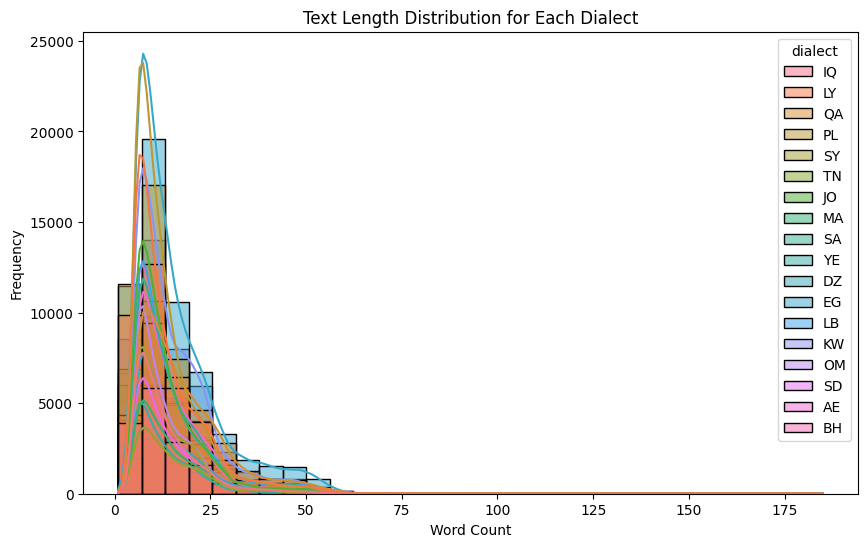

In [35]:
# Visualize text length distribution for each dialect
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data=combined_df, x='word_count', hue='dialect', kde=True, bins=30)
plt.title('Text Length Distribution for Each Dialect')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()


In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout

# Assuming you have the 'combined_df' DataFrame
X_train, X_test, y_train, y_test = train_test_split(combined_df['text'], combined_df['dialect_num'], test_size=0.2, random_state=42)


In [42]:
# Tokenize the text
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)


vocab_size = len(tokenizer.word_index) + 1
max_length = max(len(seq) for seq in X_train_seq)

In [44]:
# Pad sequences to a fixed length
from tensorflow.keras.preprocessing.sequence import pad_sequences
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length, padding='post') 


In [45]:

# Create the 1D CNN model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=100, input_length=max_length))
model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(18, activation='softmax'))  # Assuming 18 classes (dialects)


In [46]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_pad, y_train, epochs=10, validation_data=(X_test_pad, y_test))


Epoch 1/10


11438/11438 [==============================] - 2366s 207ms/step - loss: 1.9866 - accuracy: 0.3788 - val_loss: 1.7007 - val_accuracy: 0.4652
Epoch 2/10
11438/11438 [==============================] - 2365s 207ms/step - loss: 1.5004 - accuracy: 0.5315 - val_loss: 1.6772 - val_accuracy: 0.4868
Epoch 3/10
11438/11438 [==============================] - 2367s 207ms/step - loss: 1.1161 - accuracy: 0.6517 - val_loss: 1.8104 - val_accuracy: 0.4808
Epoch 4/10
11438/11438 [==============================] - 2601s 227ms/step - loss: 0.8040 - accuracy: 0.7500 - val_loss: 2.1586 - val_accuracy: 0.4656
Epoch 5/10
11438/11438 [==============================] - 2463s 215ms/step - loss: 0.5902 - accuracy: 0.8182 - val_loss: 2.4902 - val_accuracy: 0.4587
Epoch 6/10
11438/11438 [==============================] - 2485s 217ms/step - loss: 0.4490 - accuracy: 0.8618 - val_loss: 2.9874 - val_accuracy: 0.4520
Epoch 7/10
11438/11438 [==============================] - 2465s 215ms/step - loss: 0.3592 -

In [47]:
model.save_weights('./checkpoints/my_checkpoint')

In [48]:
# Save the model after training
model.save("cnn1d_model_weights.h5")

C:\Users\hadee\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [49]:
import pickle

# Save the tokenizer to a file
with open('tokenizer.pkl', 'wb') as tokenizer_file:
    pickle.dump(tokenizer, tokenizer_file)


In [50]:
import gradio as gr
import pickle
from tensorflow.keras.preprocessing.sequence import pad_sequences


C:\Users\hadee\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [51]:
# Load the tokenizer
with open('tokenizer.pkl', 'rb') as tokenizer_file:
    tokenizer = pickle.load(tokenizer_file)

# Create the 1D CNN model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=100, input_length=max_length))
model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(18, activation='softmax'))  # Assuming 18 classes (dialects)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Load the saved model weights
model.load_weights('./checkpoints/my_checkpoint')


In [58]:
def predict_dialect(text):
    # Tokenize and pad the input text
    text_seq = tokenizer.texts_to_sequences([text])
    text_pad = pad_sequences(text_seq, maxlen=max_length, padding='post')

    # Make predictions
    predictions = model.predict(text_pad)
    predicted_class = int(predictions.argmax(axis=-1))

    # Map the predicted class to the corresponding dialect
    dialect_mapping = {0: 'AE', 1: 'BH', 2: 'DZ', 3: 'EG', 4: 'IQ', 
                   5: 'JO', 6: 'KW', 7: 'LB', 8: 'LY', 9: 'MA', 
                   10: 'OM', 11: 'PL', 12: 'QA', 13: 'SA', 
                   14: 'SD', 15: 'SY', 16: 'TN', 17: 'YE'}

    predicted_dialect = dialect_mapping[predicted_class]

    return predicted_dialect


In [59]:
iface = gr.Interface(fn=predict_dialect, inputs="text", outputs="text")
iface.launch()


Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.


1/1 [==============================] - 0s 29ms/step


C:\Users\hadee\AppData\Local\Temp\ipykernel_32020\1558503741.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_class = int(predictions.argmax(axis=-1))


1/1 [==============================] - 0s 21ms/step


In [60]:
from tensorflow.keras.models import load_model

# Load the entire model
loaded_model = load_model("cnn1d_model_weights.h5")


In [61]:
def predict_dialect(text):
    # Tokenize and pad the input text
    text_seq = tokenizer.texts_to_sequences([text])
    text_pad = pad_sequences(text_seq, maxlen=max_length, padding='post')

    # Make predictions using the loaded model
    predictions = loaded_model.predict(text_pad)
    predicted_class = int(predictions.argmax(axis=-1))

    # Map the predicted class to the corresponding dialect
    dialect_mapping = {0: 'AE', 1: 'BH', 2: 'DZ', 3: 'EG', 4: 'IQ', 
                   5: 'JO', 6: 'KW', 7: 'LB', 8: 'LY', 9: 'MA', 
                   10: 'OM', 11: 'PL', 12: 'QA', 13: 'SA', 
                   14: 'SD', 15: 'SY', 16: 'TN', 17: 'YE'}
    predicted_dialect = dialect_mapping[predicted_class]

    return predicted_dialect


In [62]:
iface = gr.Interface(fn=predict_dialect, inputs="text", outputs="text")
iface.launch()


Running on local URL:  http://127.0.0.1:7862

To create a public link, set `share=True` in `launch()`.


1/1 [==============================] - 0s 97ms/step


C:\Users\hadee\AppData\Local\Temp\ipykernel_32020\2143799449.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_class = int(predictions.argmax(axis=-1))


1/1 [==============================] - 0s 26ms/step


In [63]:
iface = gr.Interface(fn=predict_dialect, inputs="text", outputs="text")
iface.launch()


Running on local URL:  http://127.0.0.1:7864

To create a public link, set `share=True` in `launch()`.


1/1 [==============================] - 0s 27ms/step


C:\Users\hadee\AppData\Local\Temp\ipykernel_32020\2143799449.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_class = int(predictions.argmax(axis=-1))


In [ ]:
///////////////////////////////////////////////////////////////////
//////////////////////////////////////////////////////////////////